In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv("student_data.csv")
dataset.head(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Duration of Sleep,Sample Question Papers Practiced,Performance
0,7,99,Yes,9,1,91
1,4,82,No,4,2,65
2,8,51,Yes,7,2,45
3,5,52,Yes,5,2,36
4,7,75,No,8,5,66


**1. Identify the dependent and independent variables.**


---




In [ ]:
dataset.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Duration of Sleep', 'Sample Question Papers Practiced', 'Performance'],
      dtype='object')

In [ ]:
independent = dataset[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Duration of Sleep', 'Sample Question Papers Practiced']]
dependent = dataset['Performance']

**2. Read the dataset and do exploratory data analysis. (Data Preprocessing and meaningful plots)**

---



In [ ]:
#Reading the dataset
dataset = pd.read_csv("student_data.csv")
dataset.head(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Duration of Sleep,Sample Question Papers Practiced,Performance
0,7,99,Yes,9,1,91
1,4,82,No,4,2,65
2,8,51,Yes,7,2,45
3,5,52,Yes,5,2,36
4,7,75,No,8,5,66


In [ ]:
dataset.info()
print("Total no. of rows and columns", dataset.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Hours Studied                     10000 non-null  int64 
 1   Previous Scores                   10000 non-null  int64 
 2   Extracurricular Activities        10000 non-null  object
 3   Duration of Sleep                 10000 non-null  int64 
 4   Sample Question Papers Practiced  10000 non-null  int64 
 5   Performance                       10000 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 468.9+ KB
Total no. of rows and columns (10000, 6)


In [ ]:
#Data Preprocessing
print(dataset.isnull().sum(), "\nThere are no null values present!")

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Duration of Sleep                   0
Sample Question Papers Practiced    0
Performance                         0
dtype: int64 
There are no null values present!


In [ ]:
print(dataset.duplicated(), "\nThere are no duplicate values present!")

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool 
There are no duplicate values present!


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Hours Studied                     10000 non-null  int64 
 1   Previous Scores                   10000 non-null  int64 
 2   Extracurricular Activities        10000 non-null  object
 3   Duration of Sleep                 10000 non-null  int64 
 4   Sample Question Papers Practiced  10000 non-null  int64 
 5   Performance                       10000 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 468.9+ KB


In [ ]:
#changing categorical value to numerical value
cat_to_num = pd.DataFrame(dataset)
cat_to_num["Extracurricular Activities"] = cat_to_num["Extracurricular Activities"].map({"Yes": 1, "No": 0})

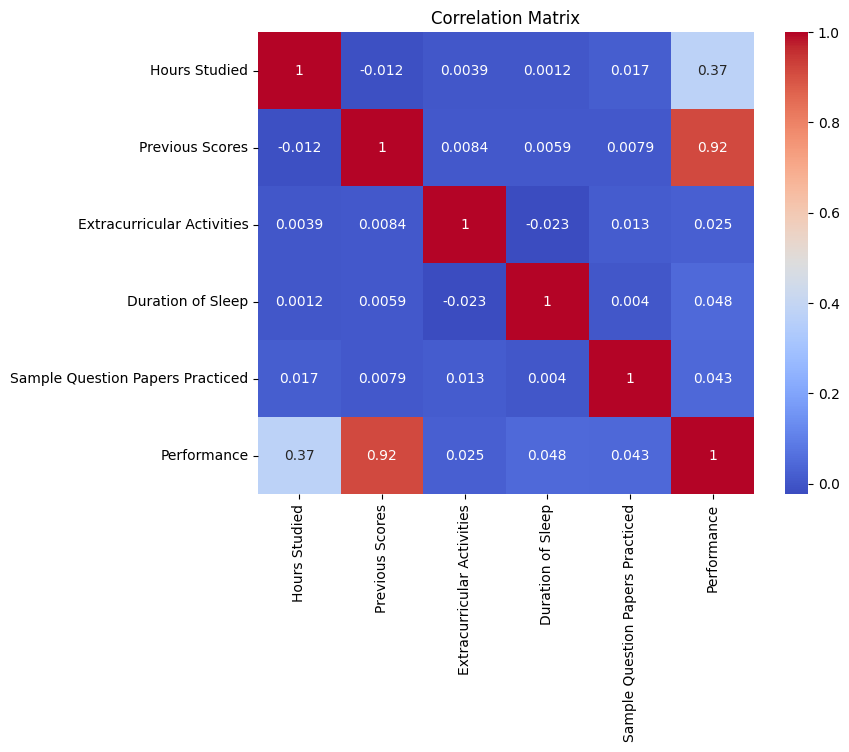

In [ ]:
#Plotting Graphs
correlation_matrix = cat_to_num.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

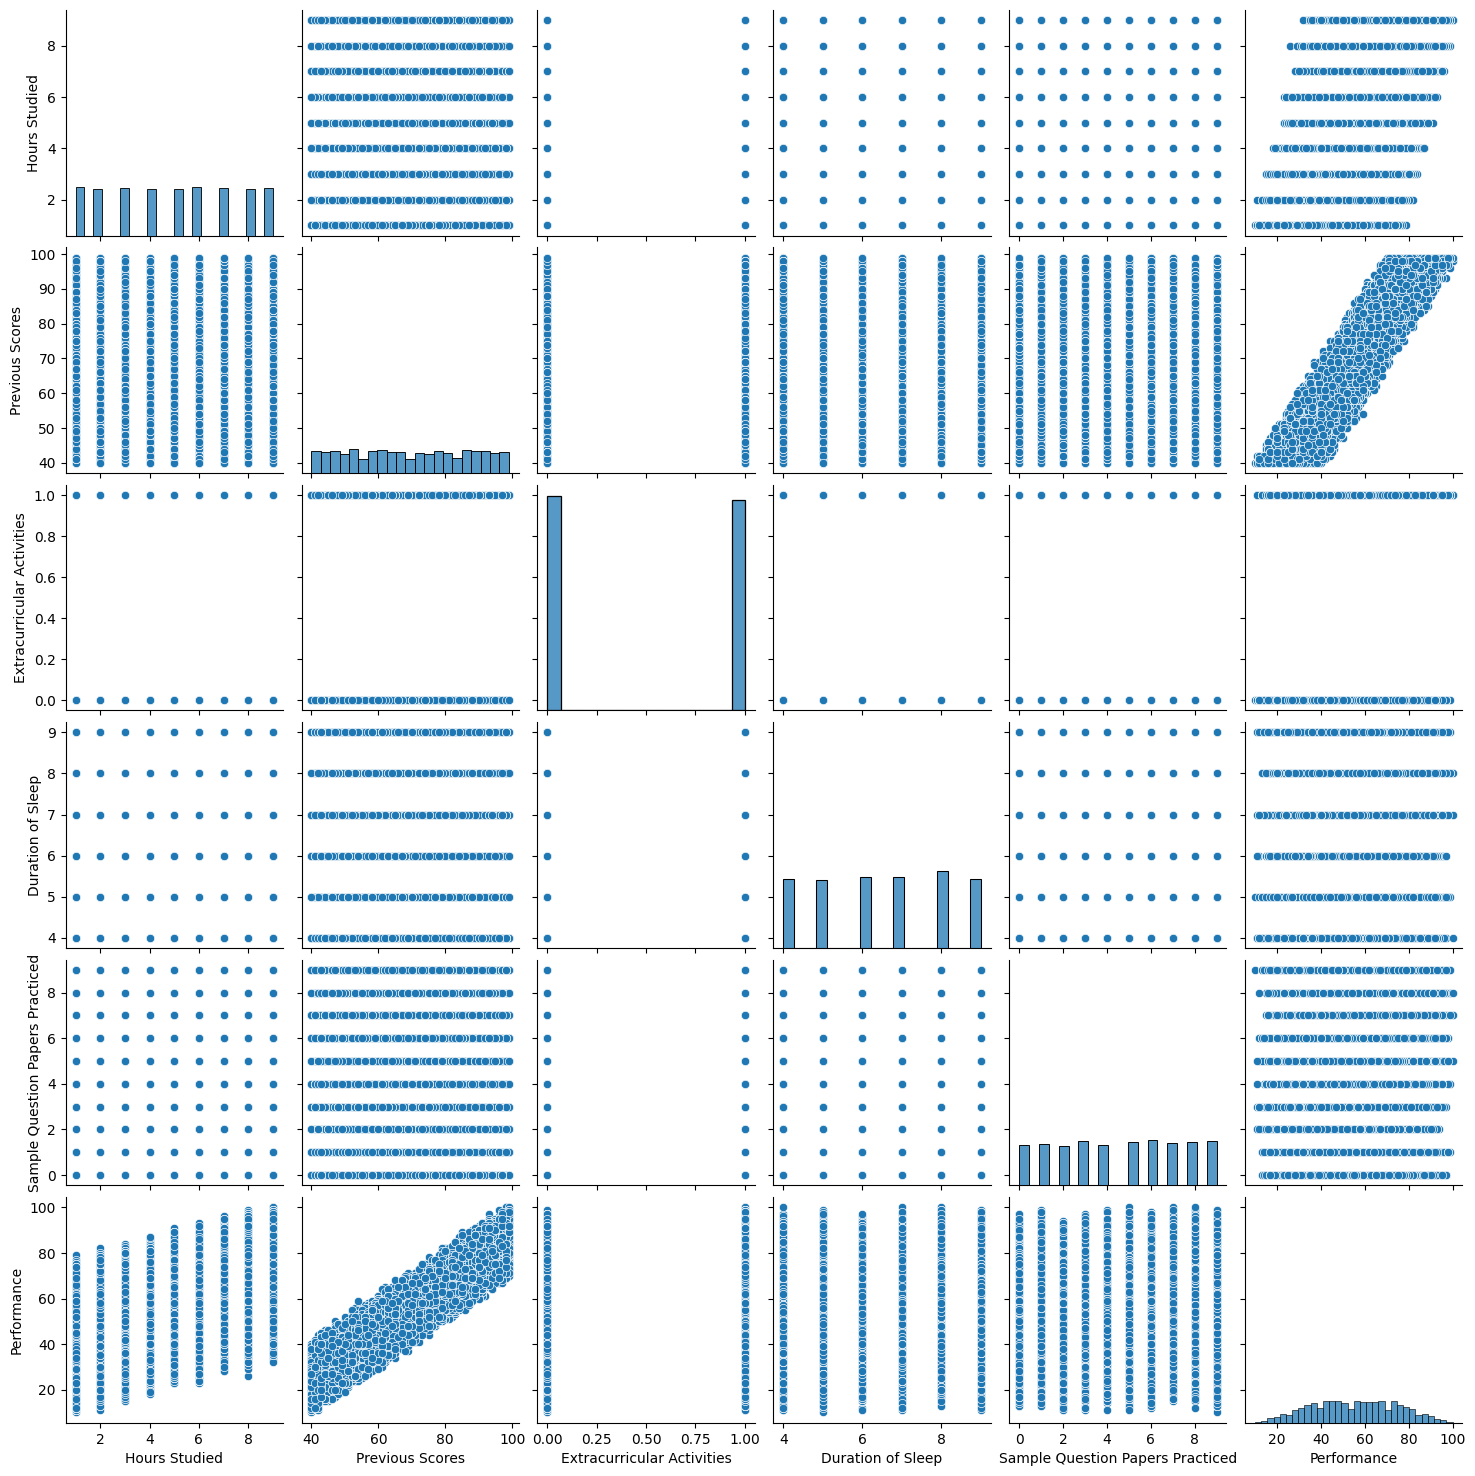

In [ ]:
sns.pairplot(cat_to_num)
plt.show()

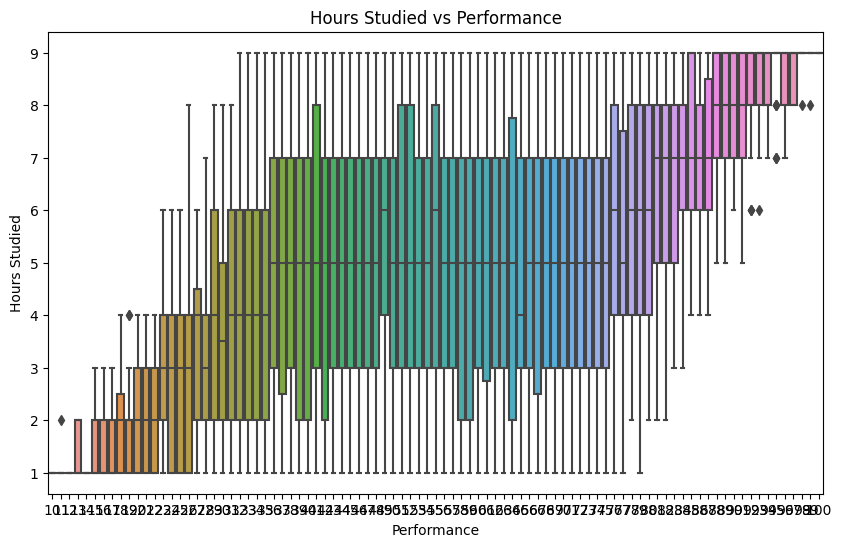

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data = cat_to_num, x="Performance", y="Hours Studied")
plt.title("Hours Studied vs Performance")
plt.show()

**Q3. Split the data set in train and test (80:20) ratio.**

---



In [ ]:
ds = pd.DataFrame(cat_to_num)

# Separate features (X) and target (Y)
X = ds.drop("Performance", axis=1)
Y = ds["Performance"]

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (8000, 5)
X_test shape: (2000, 5)
Y_train shape: (10000,)
Y_test shape: (2000,)


**Q4. Write a python code for Linear Regression (from scratch) & train the model with training
data. (Only numpy, pandas should be used)**

---



In [ ]:
class Linear_Regression:
    def __init__(self, epochs = 1000, learning_rate = 0.0001):
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.wt = None
        self.bias = None
        self.loss_history = []

    def fit(self, X, Y):
        samples, features = X.shape
        self.wt = np.zeros(features)
        self.bias = 0

        for _ in range (self.epochs):
          ypred = np.dot(X, self.wt) + self.bias

          dW = (1/samples) * np.dot(X.T, (ypred - Y))
          dB = (1/samples) * np.sum(ypred - Y)

          self.wt = self.wt - self.learning_rate * dW
          self.bias = self.bias - self.learning_rate *dB

          error = Y - X.dot(self.wt) - self.bias
          loss = np.mean(error ** 2)  #Mean Squared Error
          self.loss_history.append(loss)

    def prediction(self, X):
        return np.dot(X, self.wt) + self.bias

In [ ]:
sample_data = {
    'Hours_Studied': [7, 4, 8, 5, 7],
    'Previous_Scores': [99, 82, 51, 52, 75],
    'Extracurricular_Activities': [1, 0, 1, 1, 0],
    'Duration_of_Sleep': [9, 4, 7, 5, 8],
    'Sample_Question_Papers_Practiced': [1, 2, 2, 2, 5],
    'Performance': [91, 65, 45, 36, 66]
}

df = pd.DataFrame(sample_data)
X = df[['Hours_Studied', 'Previous_Scores', 'Extracurricular_Activities', 'Duration_of_Sleep', 'Sample_Question_Papers_Practiced']].values
Y = df['Performance'].values

model = Linear_Regression(epochs = 1000, learning_rate = 0.0001)
model.fit(X, Y)

In [ ]:
test = np.array([4, 82, 0, 7, 2])
p = model.prediction(test)
print("Performance Prediction: ", p)

Performance Prediction:  69.81517811286346


**Q5. Plot the loss vs epoch curve.**

---



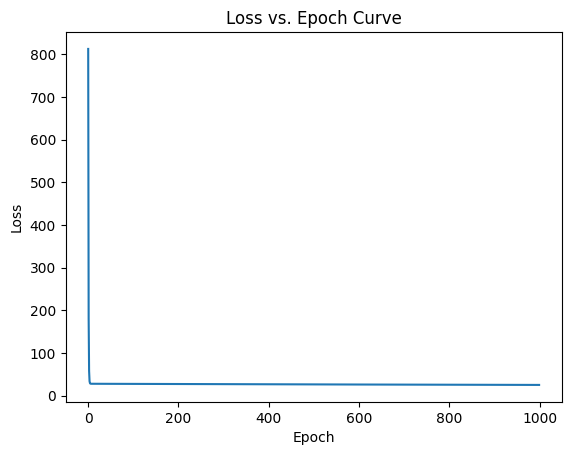

In [ ]:
plt.plot(range(model.epochs), model.loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch Curve')
plt.show()

**Q6. Give a student’s data – [Hours of study = 7, Previous score = 95, Extracurricular Activities =
Yes, Duration of Sleep = 7, Sample Question Papers Practiced = 6] then What will be his/her performance based on your trained model.**


---





In [ ]:
student_data = {
    'Hours of study': [7],
    'Previous score': [95],
    'Extracurricular Activities' : [1],
    'Duration of Sleep' : [7],
    'Sample Question Papers Practiced' : [6]
}

student = pd.DataFrame(student_data).values

pred_perf = model.prediction(student)
print("Predicted Performance:", pred_perf)

Predicted Performance: [80.07603486]


**Q7. Evaluate the model’s performance based on any two-performance metrics (at least 2) from
below on the test set – a.) MSE error b.) R2 Score c.) Adjusted R2 score (Only numpy and
pandas is allowed)**


---



In [ ]:
#MSE Error
def MSE_Error(p, Y):
  mse = np.mean((p - Y) ** 2)
  return mse

#R2Score
def R2_Score(p, Y):
  ss_total = np.sum((Y - Y.mean()) ** 2)
  ss_residual = np.sum((p - Y) ** 2)
  r2 = 1 - (ss_residual / ss_total)
  return r2

tr_pred = model.prediction(X_train)
te_pred = model.prediction(X_test)

tr_r2 = R2_Score(tr_pred, Y_train)
tr_mse = MSE_Error(tr_pred, Y_train)

te_r2 = R2_Score(te_pred, Y_test)
te_mse = MSE_Error(te_pred, Y_test)

print(f"MSE on train Loss: {tr_mse}")
print(f"R2 on train loss: {tr_r2}")

print(f"MSE on test Loss: {te_mse}")
print(f"R2 on test loss: {te_r2}")

MSE on train Loss: 82.26137001769813
R2 on train loss: 0.7768717068687276
MSE on test Loss: 82.69539902918548
R2 on test loss: 0.776851806889121
